In [14]:
%load_ext autoreload  
%autoreload 2  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
from pathlib import Path
from ocpy.data import Data
# 1) Dosyanın yolu
excel_path = "DD_CrB_Minima.xlsx"

# 2) Excel'deki gerçek kolon adlarını, bizim beklediğimiz adlarla eşleştir
#    Data.from_file şunu bekliyor: ["minimum_time","minimum_time_error","weights","minimum_type","labels"]
#    Eğer dosyada "HJD" varsa onu minimum_time yapalım.  :contentReference[oaicite:1]{index=1}
columns = {
    "minimum_time": "BJD Min",   # dosyada HJD kolonun varsa
    "minimum_time_error": "Err",
    # "weights": "Weight",
    # "minimum_type": "Type",
    # "labels": "Comment",
}

# 3) Data nesnesini oku (burada columns'u veriyoruz ki rename etsin)
data = Data.from_file(excel_path, columns=columns)  # :contentReference[oaicite:2]{index=2}
data = data.calculate_weights()

# 4) Artık sen buraya kendi referanslarını yazacaksın
ref_minimum =  2455611.92657    # ← bunu sen vereceksin
ref_period  =  0.161770446      # ← bunu da sen vereceksin

# 5) O–C nesnesine çevir
oc = data.calculate_oc(
    reference_minimum=ref_minimum,
    reference_period=ref_period,
    model_type="lmfit",   # istersen "pymc"
)  # :contentReference[oaicite:3]{index=3}

# 6) Kontrol için
print(oc.data.head())

   minimum_time  minimum_time_error       weights minimum_type labels  \
0  2.460057e+06            0.000003  1.111111e+11         None   None   
1  2.460461e+06            0.000003  1.111111e+11         None   None   
2  2.460411e+06            0.000006  2.991209e+10         None   None   
3  2.458968e+06            0.000006  2.777778e+10         None   None   
4  2.458968e+06            0.000006  2.777778e+10         None   None   

     cycle        oc  
0  27475.0 -0.000108  
1  29972.0 -0.000060  
2  29663.0 -0.000029  
3  20746.0 -0.000040  
4  20747.0 -0.000028  


(<Figure size 1000x540 with 1 Axes>, <Axes: xlabel='Cycle', ylabel='O−C'>)

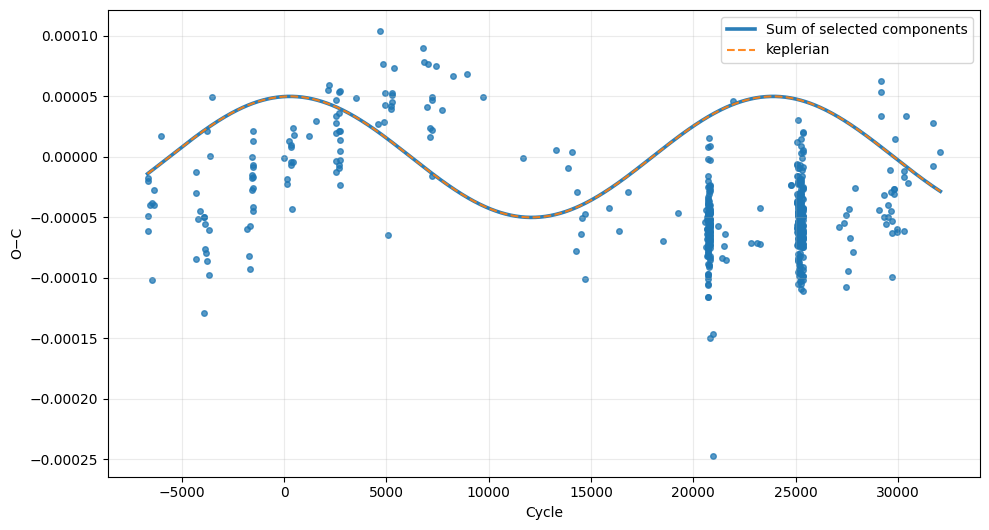

In [20]:
from ocpy.oc import Linear, Quadratic, Keplerian, KeplerianOld

kep = Keplerian(e=0.0, omega=204.1, amp=0.00005, P=3820/ref_period, T= 55000)
oc.plot_components_on_data([kep])